## Задача

#### Застосуйте описані вище методи кластеризації на датасеті винних сортів UCI ML Wine Data Set.
#### Завантажити його можна командою datasets.load_wine. 
#### Результати кластеризацій оформіть у вигляді файлу ipynb.

### Кластеризація методом k-середніх (k-means clustering)

Кластеризацію методом k-середніх можна виконати за допомогою функції KMeans із модуля sklearn.cluster.

In [38]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [39]:
# Завантажимо датасет
wine_df = datasets.load_wine()

In [40]:
# Створюємо нашу модель за методом к-середніх
# n_clusters=3 - максимальна кількість кластерів
model = KMeans(n_clusters=3)

In [41]:
# Навчаємо екземпляр нашої моделі
# В якості навчання ми передаємо тільки Х, у ми не передаємо. 
model.fit(wine_df.data)

C:\Python\Sturtup_Academy\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [42]:
# Випробовуємо нашу модель
predictions = model.predict(wine_df.data)

In [43]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2])

In [44]:
# Щоб візуалізувати наші кластери, нам спочатку треба їх виділити

cluster_0 = wine_df.data[predictions == 0]
cluster_1 = wine_df.data[predictions == 1]
cluster_2 = wine_df.data[predictions == 2]

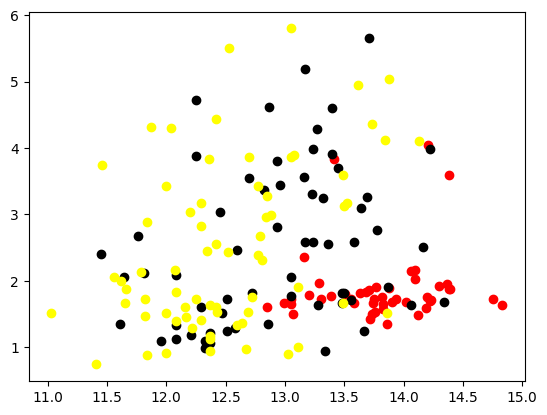

In [45]:
# Виконуємо візуалізацію

plt.scatter(cluster_0[:,0] , cluster_0[:,1] , color = 'red')
plt.scatter(cluster_1[:,0] , cluster_1[:,1] , color = 'black')
plt.scatter(cluster_2[:,0] , cluster_2[:,1] , color = 'yellow')

### Кластеризація на основі щільності (DBSCAN)

Для реалізації методу DBSCAN використаємо відповідну модель із модуля sklearn.cluster.

Також нам знадобиться модель методу головних компонент (PCA, principal component analysis), яка дозволяє зменшити розмірність даних без надмірної втрати вагомої інформації.

PCA знадобиться нам для ефективної візуалізації результатів роботи алгоритму.

Основні параметри, які необхідно задати DBSCAN – мінімальна відстань між об”єктами-сусідами (eps) та мінімальна кількість сусідів (min_samples).

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [57]:
# Створюємо екземпляр нашої моделі
# мінімальна відстань між об”єктами-сусідами (eps) та мінімальна кількість сусідів (min_samples)
dbscan = DBSCAN(eps=40, min_samples=8)

In [58]:
# Проводимо навчання
dbscan.fit(wine_df.data)

DBSCAN(eps=40, min_samples=8)

In [59]:
# Для візуалізації будуємо декілька обєктів, і пропускаємо їх через цикл for

pca = PCA(n_components=2).fit(wine_df.data)
pca_2d = pca.transform(wine_df.data)
pca_2d

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

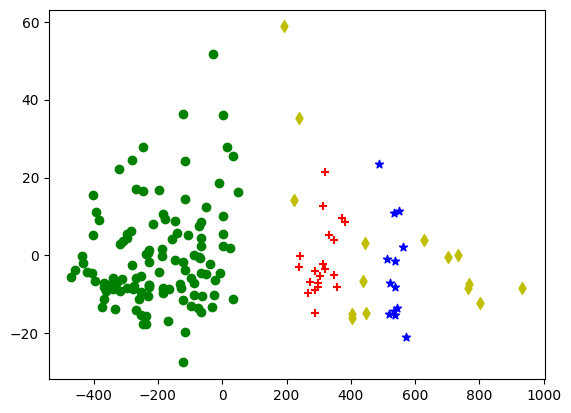

In [60]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')

### Ієрархічний кластерний аналіз

Для реалізації ієрархічної кластеризації нам знадобляться моделі linkage (власне реалізує алгоритм висхідної кластеризації) та dendrogram (формує дендрограму).

Їх можна імпортувати із scipy.cluster.hierarchy.

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [62]:
mergings = linkage(wine_df.data, method = 'complete')

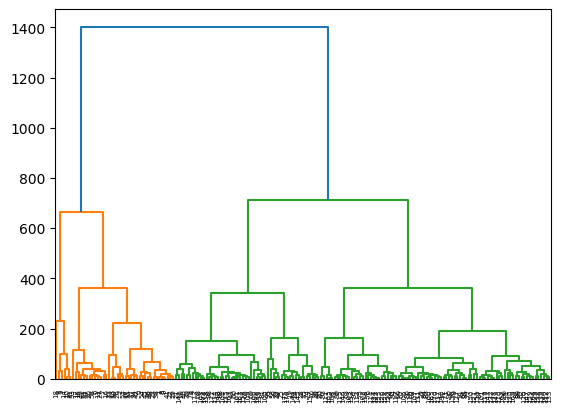

In [63]:
clusters = dendrogram(mergings,leaf_rotation=90)